In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read simulation outputs

# 4 bits code={0..16}
filename = '../simulations/ngspice/tb_capb_20250910.raw'
with open(filename, 'r') as f:
    d1 = f.readlines()

variables = int(d1[5][15:])
print(variables)
points = int(d1[6][12:])
print(points)

var_names = []
for i in range(0,variables):
    var_names.append(d1[8+i])


2
5000


In [3]:
def read_data_from_index(points,variables,d,j,k):
    global freq,absz
    for i in range(0,points):
        aux = d[j+(variables+1)*i]
        aux = aux.split()[1]
        freq[k].append(float(aux.split(',')[0]))
        aux = d[j+1+(variables+1)*i]
        absz[k].append(float(aux.split(',')[0]))


freq = [ [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] ]
absz = [ [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[] ]

j = [11, 15022, 30033, 45044, 60055, 75066, 90077, 105088, 120099, 135110, 150121, 165132, 180143, 195154, 210165, 225176]
for k in range(0,16):
    read_data_from_index(points,variables,d1,j[k],k)


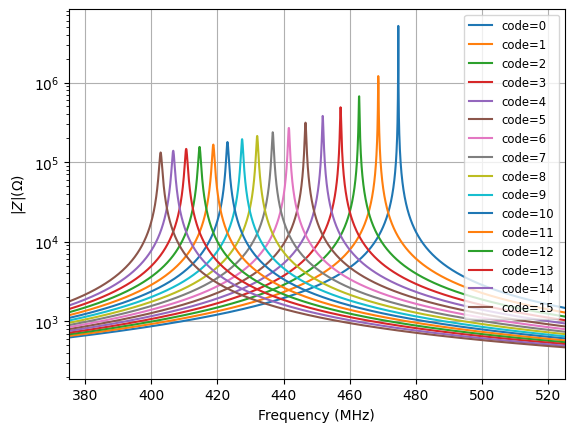

In [9]:
# ID vs VGS

#axs[0].set_title('sg13_lv_nmos (L=0.13um, VDS=0.75V)')
plt.semilogy(1e-6*np.array(freq[0]), absz[0], label='code=0')
plt.semilogy(1e-6*np.array(freq[1]), absz[1], label='code=1')
plt.semilogy(1e-6*np.array(freq[2]), absz[2], label='code=2')
plt.semilogy(1e-6*np.array(freq[3]), absz[3], label='code=3')
plt.semilogy(1e-6*np.array(freq[4]), absz[4], label='code=4')
plt.semilogy(1e-6*np.array(freq[5]), absz[5], label='code=5')
plt.semilogy(1e-6*np.array(freq[6]), absz[6], label='code=6')
plt.semilogy(1e-6*np.array(freq[7]), absz[7], label='code=7')
plt.semilogy(1e-6*np.array(freq[8]), absz[8], label='code=8')
plt.semilogy(1e-6*np.array(freq[9]), absz[9], label='code=9')
plt.semilogy(1e-6*np.array(freq[10]), absz[10], label='code=10')
plt.semilogy(1e-6*np.array(freq[11]), absz[11], label='code=11')
plt.semilogy(1e-6*np.array(freq[12]), absz[12], label='code=12')
plt.semilogy(1e-6*np.array(freq[13]), absz[13], label='code=13')
plt.semilogy(1e-6*np.array(freq[14]), absz[14], label='code=14')
plt.semilogy(1e-6*np.array(freq[15]), absz[15], label='code=15')
plt.ylabel(r'$|Z| (\Omega)$')
plt.xlabel('Frequency (MHz)')
plt.xlim(375,525)
plt.grid()
plt.legend(loc='best',fontsize='small')

plt.show()
